## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [2]:
# loading data
df = pd.read_csv('complaints.csv')

C:\Users\pande\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#to see shape of data
df.shape
# there are 18 columns and 2496491 rows

(2496491, 18)

In [4]:
#checking available columns and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496491 entries, 0 to 2496490
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 342.

In [5]:
#lets print the top 5 data 
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-05-03,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,NaN,NaN,Ameritech Financial,FL,33023.0,NaN,Consent not provided,Web,2019-05-15,Untimely response,No,NaN,3231257
1,2022-01-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,NV,89146.0,NaN,NaN,Web,2022-01-15,In progress,Yes,NaN,5111916
2,2021-12-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,First Progress Card was notified throughout th...,NaN,Synovus Bank,DE,19805.0,NaN,Consent provided,Web,2021-12-08,Closed with explanation,Yes,NaN,4984749
3,2021-12-31,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"As by Law, under 15 U.S Code 1601- Congression...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MD,20744.0,NaN,Consent provided,Web,2021-12-31,Closed with explanation,Yes,NaN,5057575
4,2019-12-04,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"General Motors Financial Company, Inc.",NJ,8628.0,NaN,Consent not provided,Web,2019-12-04,Closed with non-monetary relief,Yes,NaN,3458216


##### by looking into the 18 columns it seems that we need only two columns for our purpose, i.e. Consumer complaint narrative and Product. So lets capture the these two column data

In [6]:
# dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

In [7]:
# It contains mising (NaN) values, since we have huge number of data we will drop the NaN.
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

In [8]:
# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint']

In [9]:
print(df1.shape)
df1.head(5)

(872949, 2)


,Product,Consumer_complaint
2,"Credit reporting, credit repair services, or o...",First Progress Card was notified throughout th...
3,"Credit reporting, credit repair services, or o...","As by Law, under 15 U.S Code 1601- Congression..."
8,"Credit reporting, credit repair services, or o...",I am XXXX XXXX and I am submitting this compla...
16,"Credit reporting, credit repair services, or o...","Dear Legal Department, This credit dispute is ..."
18,"Credit reporting, credit repair services, or o...",My bank called me and told me there was a unkn...


In [10]:
# checking unique values in Product
pd.DataFrame(df1.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Credit card or prepaid card'],
       ['Debt collection'],
       ['Mortgage'],
       ['Money transfer, virtual currency, or money service'],
       ['Vehicle loan or lease'],
       ['Checking or savings account'],
       ['Student loan'],
       ['Payday loan, title loan, or personal loan'],
       ['Consumer Loan'],
       ['Payday loan'],
       ['Bank account or service'],
       ['Credit reporting'],
       ['Prepaid card'],
       ['Credit card'],
       ['Money transfers'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [11]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [12]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)


In [13]:
# checking unique values from product after renaming the values in product
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Mortgage
2,"Payday loan, title loan, or personal loan"
3,Credit card or prepaid card
4,Debt collection
5,Consumer Loan
6,Student loan
7,"Money transfer, virtual currency, or money ser..."
8,Checking or savings account
9,Bank account or service


In [14]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()

In [15]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
808230,"Credit reporting, repair, or other","On XX/XX/2020, I submitted our mortgage paymen...",0
918222,Mortgage,For the past 6 years my mortgage payment inclu...,1
892570,"Payday loan, title loan, or personal loan",I called Prosper to understand the interested ...,2
1163069,Credit card or prepaid card,I have been a loyal customer of XXXX XXXX for ...,3
522766,Debt collection,A few months I sent Diversified Consultnts a l...,4


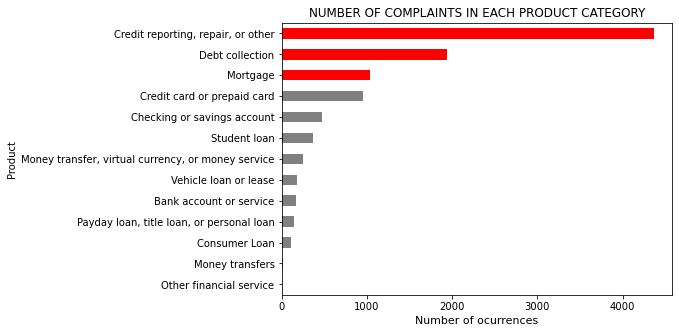

In [16]:
fig = plt.figure(figsize=(7,5))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','red','red','red']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 11);

### Building Model

In [17]:
#importing from sklearn libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [18]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()
labels = df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27890 features (TF-IDF score of unigrams and bigrams)


In [19]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> Bank account or service:
  * Most Correlated Unigrams are: promotion, overdraft, citigold
  * Most Correlated Bigrams are: bonus xxxx, promotion code, citigold checking
n==> Checking or savings account:
  * Most Correlated Unigrams are: deposit, bank, atm
  * Most Correlated Bigrams are: 00 bonus, savings account, checking account
n==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, vehicle, car
  * Most Correlated Bigrams are: dealer services, xxxx dealership, motor credit
n==> Credit card or prepaid card:
  * Most Correlated Unigrams are: rewards, citi, card
  * Most Correlated Bigrams are: balance transfer, american express, credit card
n==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: experian, equifax, report
  * Most Correlated Bigrams are: credit reporting, identity theft, credit report
n==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collection, collection agency, c

# Multi-classification Models

In [20]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [21]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    MultinomialNB()
]

In [31]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [32]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\pande\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pande\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


### Compare Text Classification Model performance

In [33]:
# comparing the ‘Mean Accuracy’ and ‘Standard Deviation’ for each of the four classification algorithms.
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
MultinomialNB,0.6243,0.008243
RandomForestClassifier,0.4384,0.001432


### Evaluating Text Classification Model

In [28]:
print(classification_report(y_test,y_pred))

C:\Users\pande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1073
           1       0.87      0.94      0.90       248
           2       1.00      0.11      0.20        44
           3       0.73      0.80      0.76       236
           4       0.78      0.75      0.77       505
           5       0.25      0.04      0.06        28
           6       0.81      0.79      0.80        84
           7       0.74      0.70      0.72        69
           8       0.54      0.58      0.56       124
           9       0.64      0.17      0.27        52
          10       0.33      0.29      0.31        34
          11       0.00      0.00      0.00         3

    accuracy                           0.79      2500
   macro avg       0.63      0.51      0.52      2500
weighted avg       0.79      0.79      0.78      2500



C:\Users\pande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pande\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The categories which yield better classification results are ‘Student loan’, ‘Mortgage’ and ‘Credit reporting, repair, or other’. 
#### The class such as ‘Debt collection’ and ‘credit card or prepaid card’ can also give better results.

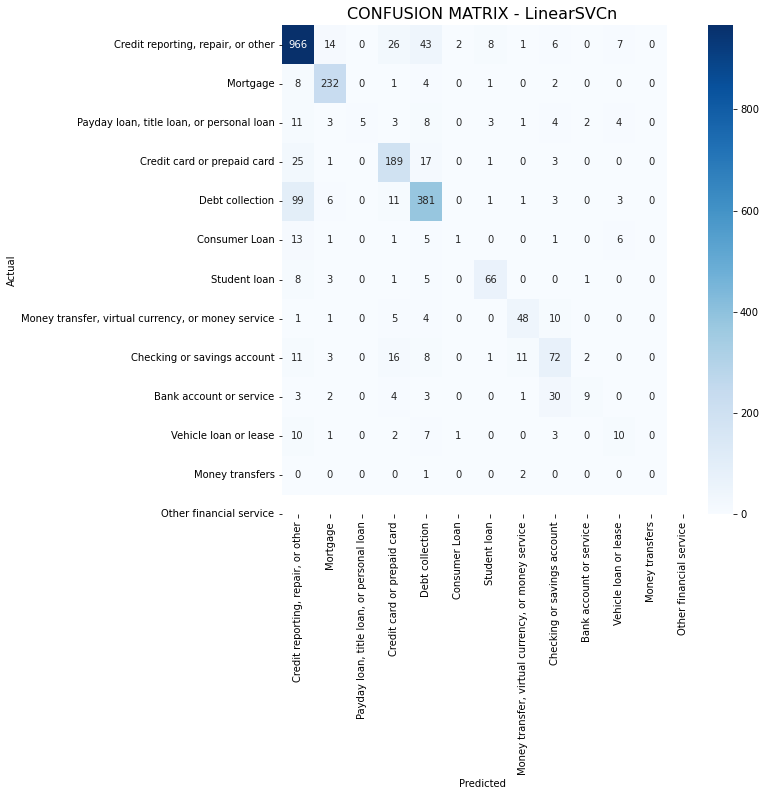

In [34]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);